In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:51<00:00, 23.8MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.0MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [5]:
# generators helps processing large amont of data
# test dataest
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

# validation dataset
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


the images are stored in numpy array which means the numpy array lies between (0-255) but we need to make it between(0-1).
in order to achieve that we need to do normalization.

In [6]:
# normalize
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# **Creating CNN Model**

In [7]:
# creating CNN Model

# creating sequential object
model=Sequential()

# 1st covolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='Valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# 2nd conv layer
model.add(Conv2D(64,kernel_size=(3,3),padding='Valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# 3rd conv layer
model.add(Conv2D(128,kernel_size=(3,3),padding='Valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# adding flatten layer(ANN)
model.add(Flatten())

# dense layers of ANN
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
# compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [10]:
# fitting the model
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 63s 86ms/step - loss: 0.6507 - accuracy: 0.6155 - val_loss: 0.5376 - val_accuracy: 0.7280
Epoch 2/10
625/625 [==============================] - 50s 80ms/step - loss: 0.4824 - accuracy: 0.7678 - val_loss: 0.4678 - val_accuracy: 0.7804
Epoch 3/10
625/625 [==============================] - 51s 80ms/step - loss: 0.3541 - accuracy: 0.8450 - val_loss: 0.5559 - val_accuracy: 0.7766
Epoch 4/10
625/625 [==============================] - 58s 92ms/step - loss: 0.2223 - accuracy: 0.9068 - val_loss: 0.7500 - val_accuracy: 0.7934
Epoch 5/10
625/625 [==============================] - 49s 79ms/step - loss: 0.1149 - accuracy: 0.9563 - val_loss: 1.0145 - val_accuracy: 0.7668
Epoch 6/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0746 - accuracy: 0.9744 - val_loss: 1.0744 - val_accuracy: 0.7804
Epoch 7/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0506 - accuracy: 0.9836 - val_loss: 1.0765 - val_accuracy:

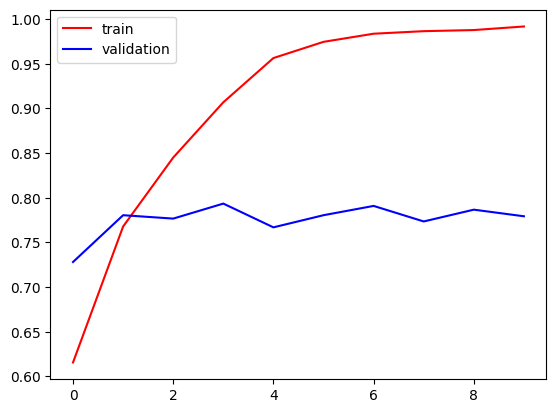

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

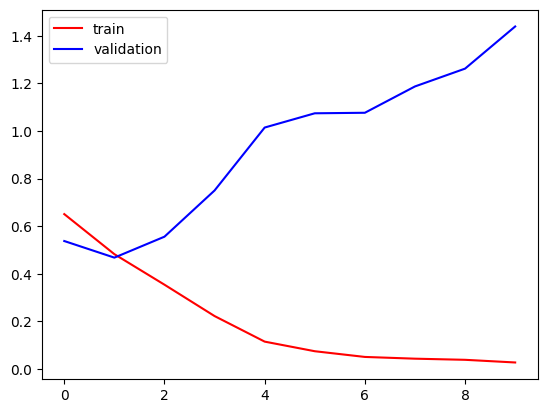

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
import cv2

# **Predicting Cat image**

In [25]:
test_img = cv2.imread('/content/cat.jpeg')

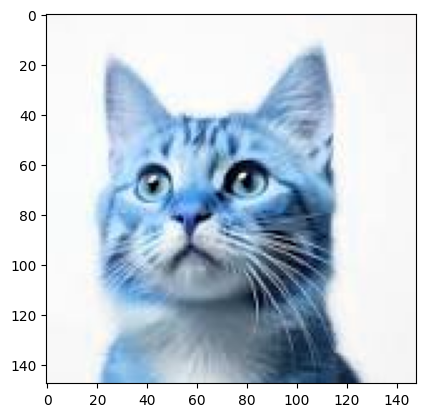

In [26]:
plt.imshow(test_img)

In [27]:
test_img.shape

(148, 148, 3)

In [28]:
test_img = cv2.resize(test_img,(256,256))

In [29]:
test_input = test_img.reshape((1,256,256,3))

In [30]:
model.predict(test_input)

1/1 [==============================] - 0s 465ms/step


array([[0.]], dtype=float32)

array[0] mean cat. so our model correctly classfied the data.